[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Successfully fetched the webpage.
Extracted Text from Web Page (Snippet):
Vintage Comics THURSDAY MORNING RIPS!!!!! w/Paradise Bahram!!! BREAKS AND PERSONALS!! CASES #16-30   -    2024 Topps CHROME UPDATE 60 Case (440 Box) Player Break ⚾🏈WEDNESDAY RIPS🏀⚽+$30 BLASTER WALL RIPS W/ JOSH! FREE SHIPPING! 11/14 V COINS & CURRENCY EDITION 357 WITH WILL & TIM! FREE SHIPPING! 11/14 R 1ST EBAY LIVE STREAM 🥳🎉 Mag's Buck & Go Show! - EL325 THUUURRRSSDAAYYY SHENANIGANS W/ A2!! TOPPS CHROME UPDATE & TREASURE PACKS!! COMICS WITH PCB HOBBY!!! FREE SHIPPING!!! 11/14 S Pokemon Singles/

Filtered Tokens (after removing stopwords):
['vintage', 'comics', 'thursday', 'morning', 'rips', 'w', 'paradise', 'bahram', 'breaks', 'personals', 'cases', '16', '30', '2024', 'topps', 'chrome', 'update', '60', 'case', '440']

Part-of-Speech Tags:
[('vintage', 'NN'), ('comics', 'NNS'), ('thursday', 'JJ'), ('morning', 'NN'), ('rips', 'NNS'), ('w', 'VBP'), ('paradise', 'JJ'), ('bahram', 'NN'), ('breaks', 'NNS'), ('personal

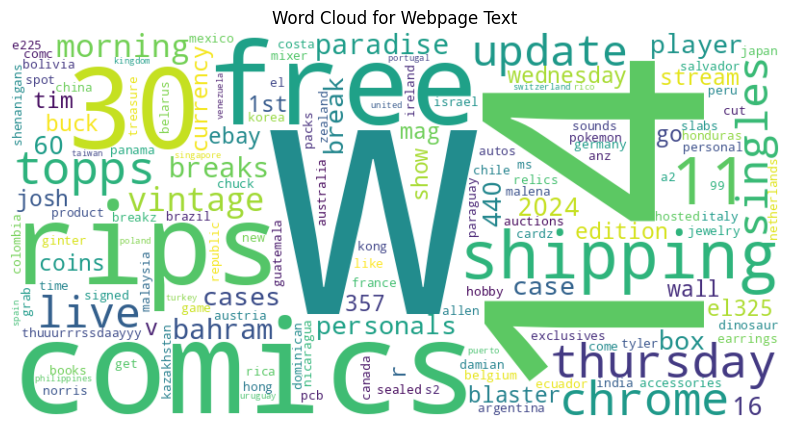


Text Summary (Extractive):
Vintage Comics THURSDAY MORNING RIPS!!!!! w/Paradise Bahram!!! BREAKS AND PERSONALS!! CASES #16-30   -    2024 Topps CHROME UPDATE 60 Case (440 Box) Player Break ⚾🏈WEDNESDAY RIPS🏀⚽+$30 BLASTER WALL RIPS W/ JOSH! FREE SHIPPING!


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure the required NLTK data is downloaded
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('averaged_perceptron_tagger_eng')  # POS Tagger
nltk.download('vader_lexicon')  # Sentiment Lexicon
nltk.download('punkt_tab')  # This line is added to download the required data package
nltk.download('maxent_ne_chunker_tab')  # Download the maxent chunker for Named Entity Recognition
nltk.download('words')  # Download the word list required for NER

# Function to fetch and parse the web page
def scrape_website(url):
    # Send HTTP request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        print("Successfully fetched the webpage.")
    else:
        print(f"Failed to fetch webpage. Status code: {response.status_code}")
        return None

    # Parse the HTML content of the webpage using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the text from the webpage (from all paragraph tags in this example)
    text = ""
    for paragraph in soup.find_all('p'):
        text += paragraph.get_text() + " "

    return text

# Example URL (Change this to any URL you want to scrape)
url = "https://www.ebay.com/"  # Wikipedia page on NLP
page_text = scrape_website(url)

if page_text:
    print("Extracted Text from Web Page (Snippet):")
    print(page_text[:500])  # Print the first 500 characters of extracted text

    # NLP operations on the extracted text
    # Clean and tokenize the text
    def clean_text(text):
        text = re.sub(r'\W', ' ', text)  # Remove non-word characters
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        return text

    # Clean the extracted text
    cleaned_text = clean_text(page_text)

    # Tokenize the text using NLTK
    try:
        tokens = word_tokenize(cleaned_text)
    except LookupError:
        print("Error: NLTK tokenizer resources not found. Attempting to download the necessary resources.")
        nltk.download('punkt')
        tokens = word_tokenize(cleaned_text)

    # Remove stopwords using NLTK
    stopwords = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stopwords]

    print("\nFiltered Tokens (after removing stopwords):")
    print(filtered_tokens[:20])  # Print the first 20 tokens after stopword removal

    # 1. POS Tagging (NLTK)
    pos_tags = pos_tag(filtered_tokens)
    print("\nPart-of-Speech Tags:")
    print(pos_tags[:20])  # Print the first 20 POS tags

    # 2. Named Entity Recognition (NER - Using NLTK)
    # Use NLTK's named entity chunking to identify named entities
    ner_tree = ne_chunk(pos_tags)

    named_entities = []
    for subtree in ner_tree:
      if isinstance(subtree, nltk.Tree):
        entity = " ".join(word for word, tag in subtree)
        label = subtree.label()
        named_entities.append((entity, label))
        print(f"Entity: {entity}, Label: {label}")

    print("\nNamed Entities (Person, Organization, Date, etc.):")
    print(named_entities)
    print(f"Total Named Entities Found: {len(named_entities)}")  # Print total count of named entities

    # 3. Word Frequency Analysis (NLTK)
    fdist = FreqDist(filtered_tokens)
    print("\nMost Common Words (Frequency):")
    print(fdist.most_common(10))  # Print the 10 most common words

    # 4. Sentiment Analysis (VADER - NLTK)
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(page_text)
    print("\nSentiment Analysis (VADER):")
    print(sentiment)

    # 5. Word Cloud (Visualization)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Webpage Text")
    plt.show()

    # 6. Text Summarization (Extractive Summary)
    # For simplicity, we'll just extract the first 5 sentences as a summary
    sentences = sent_tokenize(page_text)
    summary = ' '.join(sentences[:5])
    print("\nText Summary (Extractive):")
    print(summary)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Successfully fetched the webpage.
Extracted Text from Web Page (Snippet):
CASES #16-30   -    2024 Topps CHROME UPDATE 60 Case (440 Box) Player Break ⚾🏈WEDNESDAY RIPS🏀⚽+$30 BLASTER WALL RIPS W/ JOSH! FREE SHIPPING! 11/14 V Thursday at Cowabunga Comics w/ Broke Skull AnZ TCG & Sports card singles Hosted by Matise Pokemon Singles/Slabs/Sealed Product and More! w/ Tyler! COMC Live Auctions S2 E225 - Mixer $1 Start with LuckyVault!! Slabs & Bounty Chases !!! COINS & CURRENCY EDITION 357 WITH WILL & TIM! FREE SHIPPING! 11/14 R COINS/ GOLD NUGGETS/ SILVER / SLABS AND MORE $

Filtered Tokens (after removing stopwords):
['cases', '16', '30', '2024', 'topps', 'chrome', 'update', '60', 'case', '440', 'box', 'player', 'break', 'wednesday', 'rips', '30', 'blaster', 'wall', 'rips', 'w']

Part-of-Speech Tags:
[('cases', 'NNS'), ('16', 'CD'), ('30', 'CD'), ('2024', 'CD'), ('topps', 'NN'), ('chrome', 'NN'), ('update', 'JJ'), ('60', 'CD'), ('case', 'NN'), ('440', 'CD'), ('box', 'NN'), ('player', 'NN'),

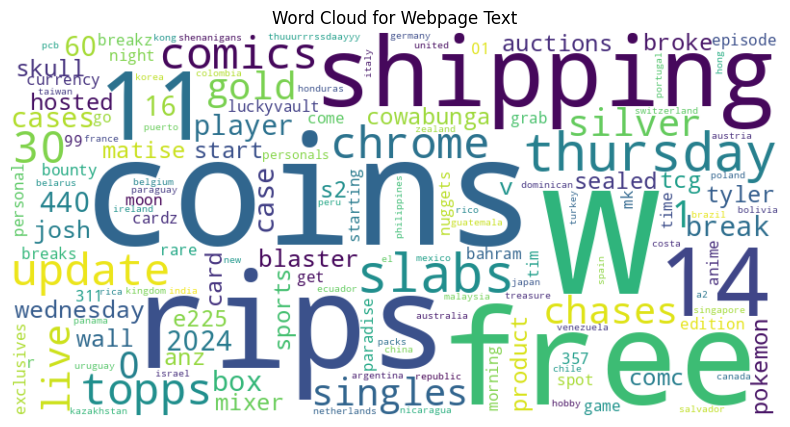


Text Summary (Extractive):
CASES #16-30   -    2024 Topps CHROME UPDATE 60 Case (440 Box) Player Break ⚾🏈WEDNESDAY RIPS🏀⚽+$30 BLASTER WALL RIPS W/ JOSH! FREE SHIPPING! 11/14 V Thursday at Cowabunga Comics w/ Broke Skull AnZ TCG & Sports card singles Hosted by Matise Pokemon Singles/Slabs/Sealed Product and More! w/ Tyler! COMC Live Auctions S2 E225 - Mixer $1 Start with LuckyVault!!


In [5]:
import requests
from bs4 import BeautifulSoup
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure the required NLTK data is downloaded
nltk.download('punkt_tab')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('averaged_perceptron_tagger_eng')  # POS Tagger
nltk.download('vader_lexicon')  # Sentiment Lexicon
nltk.download('maxent_ne_chunker_tab')  # Download the chunker for Named Entity Recognition
nltk.download('words')  # Download the word list required for NER

# Function to fetch and parse the web page
def scrape_website(url):
    # Send HTTP request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        print("Successfully fetched the webpage.")
    else:
        print(f"Failed to fetch webpage. Status code: {response.status_code}")
        return None

    # Parse the HTML content of the webpage using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the text from the webpage (from all paragraph tags in this example)
    text = ""
    for paragraph in soup.find_all('p'):
        text += paragraph.get_text() + " "

    return text

# Example URL (Change this to any URL you want to scrape)
url = "https://www.ebay.com/"  # Example URL (could be any page you want)
page_text = scrape_website(url)

if page_text:
    print("Extracted Text from Web Page (Snippet):")
    print(page_text[:500])  # Print the first 500 characters of extracted text

    # NLP operations on the extracted text
    # Clean and tokenize the text
    def clean_text(text):
        text = re.sub(r'\W', ' ', text)  # Remove non-word characters
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        return text

    # Clean the extracted text
    cleaned_text = clean_text(page_text)

    # Tokenize the text using NLTK
    try:
        tokens = word_tokenize(cleaned_text)
    except LookupError:
        print("Error: NLTK tokenizer resources not found. Attempting to download the necessary resources.")
        nltk.download('punkt')
        tokens = word_tokenize(cleaned_text)

    # Remove stopwords using NLTK
    stopwords = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stopwords]

    print("\nFiltered Tokens (after removing stopwords):")
    print(filtered_tokens[:20])  # Print the first 20 tokens after stopword removal

    # 1. POS Tagging (NLTK)
    pos_tags = pos_tag(filtered_tokens)
    print("\nPart-of-Speech Tags:")
    print(pos_tags[:20])  # Print the first 20 POS tags

     # 2. Named Entity Recognition (NER - Using NLTK)
    # Use NLTK's named entity chunking to identify named entities
    ner_tree = ne_chunk(pos_tags)

    named_entities = []
    for subtree in ner_tree:
        if isinstance(subtree, nltk.Tree):  # Check if the subtree is a named entity
            entity = " ".join(word for word, tag in subtree)
            label = subtree.label()
            named_entities.append((entity, label))

    # Print the Named Entities
    print("\nNamed Entities (Person, Organization, Date, etc.):")
    if named_entities:
        for entity, label in named_entities:
            print(f"Entity: {entity}, Label: {label}")
    else:
        print("No named entities found.")

    print(f"Total Named Entities Found: {len(named_entities)}")  # Print total count of named entities

    # 3. Word Frequency Analysis (NLTK)
    fdist = FreqDist(filtered_tokens)
    print("\nMost Common Words (Frequency):")
    print(fdist.most_common(10))  # Print the 10 most common words

    # 4. Sentiment Analysis (VADER - NLTK)
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(page_text)
    print("\nSentiment Analysis (VADER):")
    print(sentiment)

    # 5. Word Cloud (Visualization)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Webpage Text")
    plt.show()

    # 6. Text Summarization (Extractive Summary)
    # For simplicity, we'll just extract the first 5 sentences as a summary
    sentences = sent_tokenize(page_text)
    summary = ' '.join(sentences[:5])
    print("\nText Summary (Extractive):")
    print(summary)

